In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import path
import glob

In [ ]:
from phase_plates import CubicPhasePlate

N = 1000
r = 35e-3 / 16 / 2
phase_plate = CubicPhasePlate(N, N, r, m=1)
E1 = phase_plate.new_field()
fc = phase_plate.fc
fb = phase_plate.fb


# Preamble

In [23]:
from matplotlib.font_manager import FontProperties

font_path = "../fonts/LinuxLibertine/LinBiolinum_Rah.ttf"
font = FontProperties(fname=font_path)
font.set_size(18)

tick_font = FontProperties(fname=font_path)
tick_font.set_size(16)

legend_font = FontProperties(fname=font_path)
legend_font.set_size(15)

import matplotlib.ticker as ticker
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

In [3]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_theme(style="white")

In [4]:
# from skimage.metrics import peak_signal_noise_ratio as psnr
def sigma(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    nom = np.sum(abs(u_hat - u_ref)**2)
    denom = np.sum(abs(u_ref)**2)
    return nom / denom

def snr(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    signal = np.sum(abs(u_hat)**2)
    alpha = np.sum(u_hat * np.conjugate(u_ref)) / np.sum(abs(u_ref)**2)
    snr = signal / np.sum(abs(u_hat - alpha * u_ref)**2)
    return 10 * np.log10(snr)

def mse(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    h, w = u_ref.shape[-2:]
    mse = np.sum(abs(u_hat - u_ref)**2) / (h * w)
    return mse

def psnr(u_hat, u_ref):
    err = mse(u_hat, u_ref)
    return 10 * np.log10(1 / err)

def difference(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    return abs(u_hat - u_ref)

from skimage.metrics import structural_similarity as ssim

# Error Plot

In [ ]:
theta = 15
# exps = 3.5
u_GT = np.load(glob.glob(f'RS512/RS*-{theta}-*.npy')[0])
u_GT = u_GT / abs(u_GT).max()
print(glob.glob(f'RS512/RS*-{theta}-*.npy')[0])
u_BEASM = np.load(glob.glob(f'results-errplot1/BEASM*-{theta}-*.npy')[0])
u_BEASM = u_BEASM / abs(u_BEASM).max()
print(glob.glob(f'results-errplot1/BEASM*-{theta}-*.npy')[0])
print(snr(u_BEASM, u_GT))
u_ASASM = np.load(glob.glob(f'results-errplot1/ASASM*-{theta}-*.npy')[0])
u_ASASM = u_ASASM / abs(u_ASASM).max()
print(glob.glob(f'results-errplot1/ASASM*-{theta}-*.npy')[0])
print(snr(u_ASASM, u_GT)) 

In [ ]:
# plt.figure(figsize=(13,7))
# plt.subplot(2,3,1)
# plt.imshow(abs(u_BEASM - u_GT), cmap='gray')
# plt.title('complex difference')
# plt.colorbar()
# plt.subplot(2,3,2)
# # plt.imshow(abs(np.angle(u_BEASM) - np.angle(u_GT)), cmap='hsv')
# plt.imshow(np.angle(u_BEASM))
# plt.title('phase difference')
# plt.colorbar()
# plt.subplot(2,3,3)
# plt.imshow(abs(abs(u_BEASM) - abs(u_GT)), cmap='hsv')
# # plt.imshow(abs(u_GT), cmap='hsv')
# plt.title('amplitude difference')
# plt.colorbar()
# plt.subplot(2,3,4)
# plt.imshow(abs(u_ASASM - u_GT), cmap='gray')
# plt.colorbar()
# plt.subplot(2,3,5)
# # plt.imshow(abs(np.angle(u_ASASM) - np.angle(u_GT)), cmap='gray')
# plt.imshow(np.angle(u_ASASM))
# plt.colorbar()
# plt.subplot(2,3,6)
# plt.imshow(abs(abs(u_ASASM) - abs(u_GT)), cmap='hsv')
# # plt.imshow(abs(u_GT), cmap='hsv')
# plt.colorbar()

In [5]:
s = 2.5
t_ASASM = [0.06, 0.06, 0.11, 0.31, 0.90]
t_BEASM1 = [0.18, 0.77, 1.86, 3.65, 5.77]
t_BEASM2 = [0.46, 0.45, 0.34, 0.48]

angles = [0, 5, 10, 15, 20]
err_ASASM = []
err_BEASM1 = []
err_BEASM2 = []

for theta in angles:

    u_GT = np.load(glob.glob(f'RS/RS*-{theta}-*.npy')[0])
    
    u_ASASM = np.load(glob.glob(f'results-errplot2/ASASM*-{theta}-{s:.2f}.npy')[0])
    err_ASASM.append(snr(u_ASASM, u_GT)) 

    if glob.glob(f'results-errplot2/BEASM*-{theta}-*.npy') != []:
        u_BEASM = np.load(glob.glob(f'results-errplot2/BEASM*-{theta}-*.npy')[0])
        err_BEASM1.append(snr(u_BEASM, u_GT))

    if glob.glob(f'results-errplot3/BEASM*-{theta}-{s:.3f}.npy') != []:
        u_BEASM = np.load(glob.glob(f'results-errplot3/BEASM*-{theta}-{s:.3f}.npy')[0])
        err_BEASM2.append(snr(u_BEASM, u_GT))


err_ASASM1 = np.array(err_ASASM)
err_BEASM1 = np.array(err_BEASM1)
err_BEASM2 = np.array(err_BEASM2)

<Figure size 640x480 with 0 Axes>

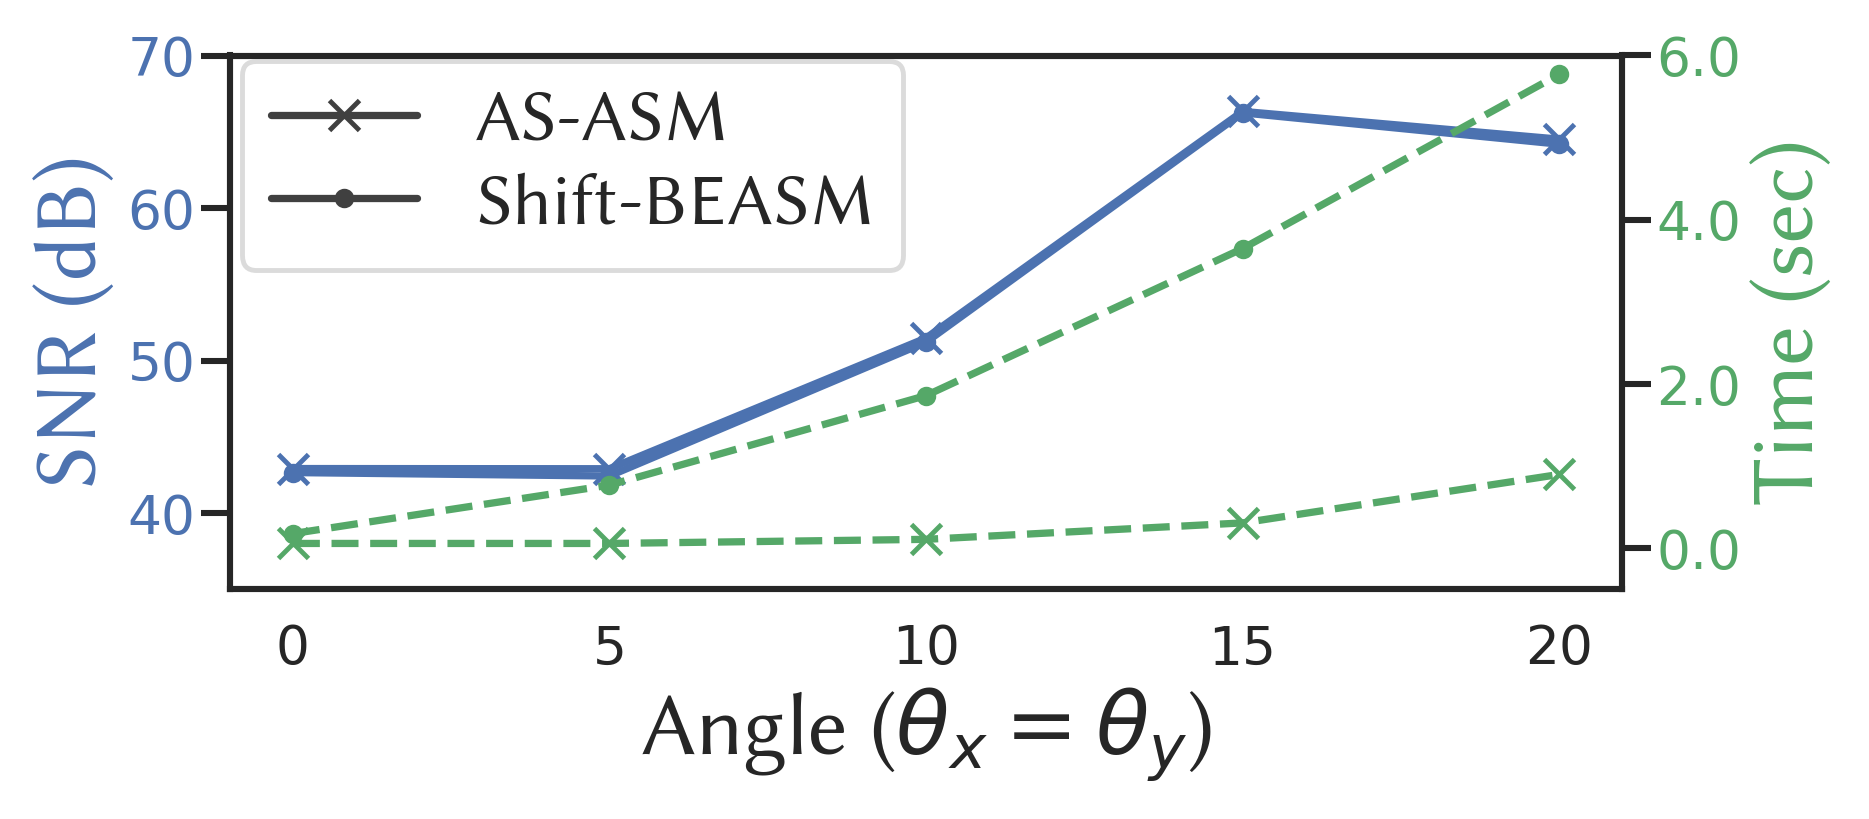

In [90]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# SNR curve
color1 = 'b'
ax1.plot(angles, err_ASASM[:len(angles)],  marker='x', color=color1)
ax1.plot(angles[:len(err_BEASM1)], err_BEASM1[:len(angles)], marker='.', color=color1)
plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
ax1.tick_params(axis='y', labelcolor=color1)
# plt.xticks(fontproperties=tick_font)
# plt.yticks(fontproperties=tick_font)
ax1.set_ylim(35, 70)
ax1.tick_params(axis='both', which='major', pad=1)


# Time
color2 = 'g'
ax2 = ax1.twinx()
ax2.plot(angles, t_ASASM[:len(angles)], marker='x', color=color2, linestyle='dashed')
ax2.plot(angles[:len(err_BEASM1)], t_BEASM1[:len(angles)], marker='.', color=color2, linestyle='dashed')
# ax2.plot(angles[:len(err_BEASM2)], t_BEASM2[:len(angles)], marker='.', label='Shift-BEASM', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
ax2.set_ylim(-0.5, 6)
ax2.tick_params(axis='both', which='major', pad=1)
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='x'),
                Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM'], prop=legend_font, loc='lower right', bbox_to_anchor=(0.51, 0.53), fancybox=True, framealpha=0.7, labelspacing = 0.2)

plt.margins(x=0, y=0)
fig.tight_layout()

<Figure size 640x480 with 0 Axes>

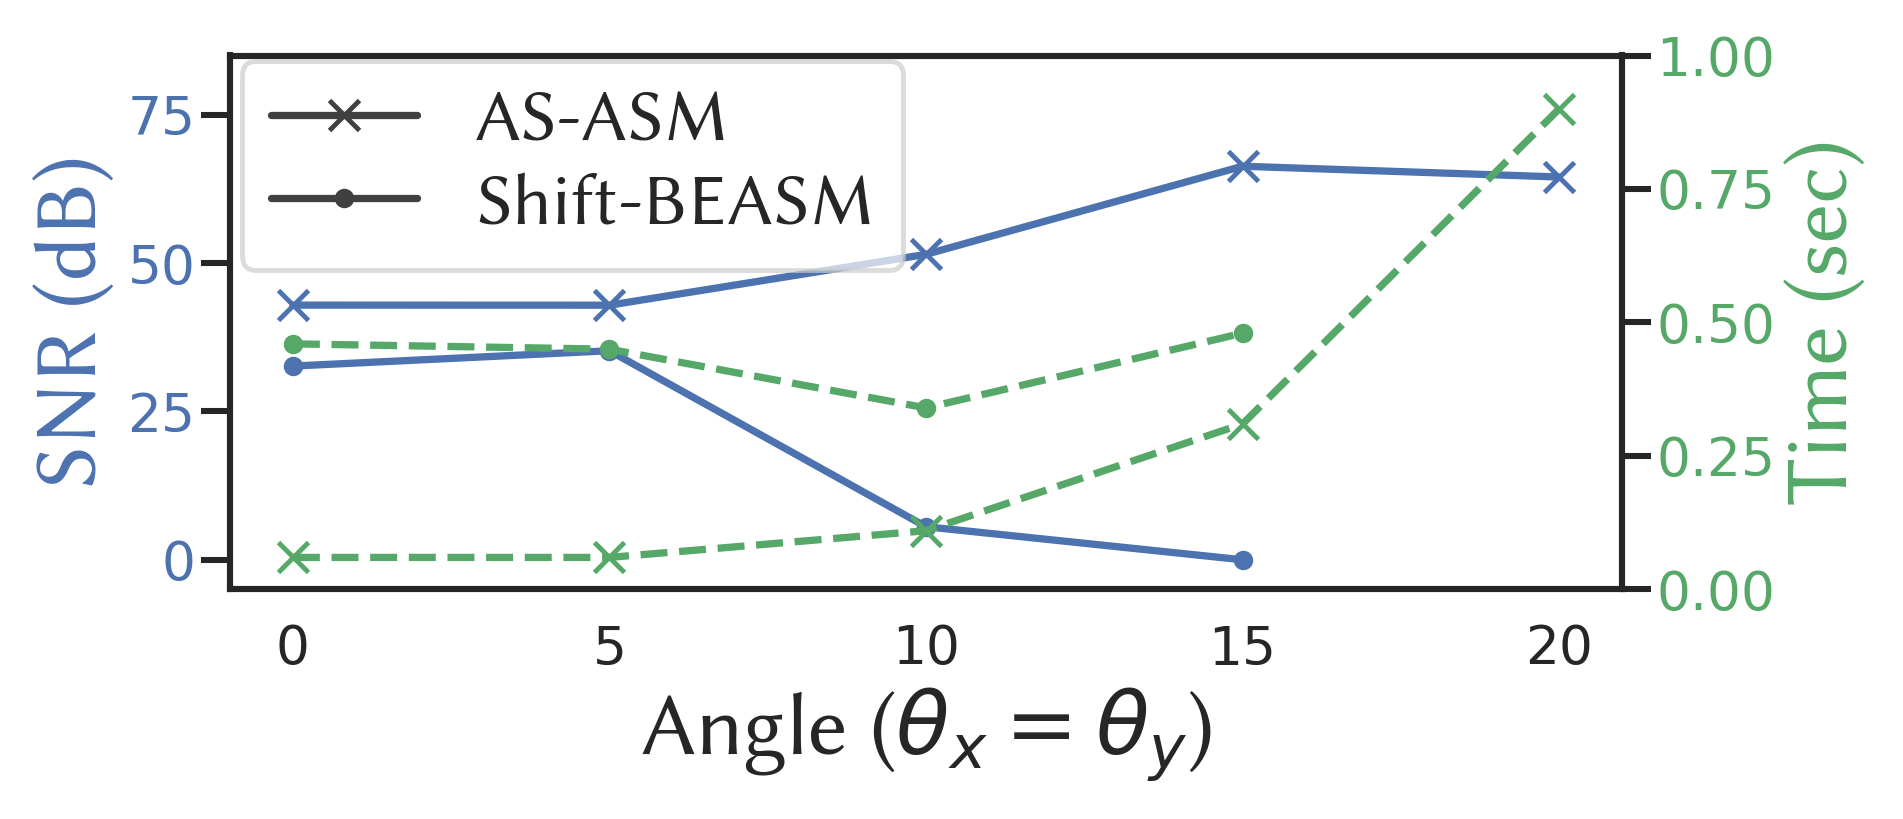

In [89]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# SNR curve
color1 = 'b'
ax1.plot(angles, err_ASASM[:len(angles)], label='AS-ASM', marker='x', color=color1)
ax1.plot(angles[:len(err_BEASM2)], err_BEASM2, marker='.', label='Shift-BEASM', color=color1)
plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
ax1.tick_params(axis='y', labelcolor=color1)
# plt.xticks(fontproperties=tick_font)
# plt.yticks(fontproperties=tick_font)
ax1.set_ylim(-5, 85)
ax1.tick_params(axis='both', which='major', pad=1)

# Time
color2 = 'g'
ax2 = ax1.twinx()
ax2.plot(angles, t_ASASM[:len(angles)], marker='x', label='AS-ASM', color=color2, linestyle='dashed')
# ax2.plot(angles[:len(err_BEASM1)], t_BEASM1[:len(angles)], marker='.', label='Shift-BEASM', color=color2, linestyle='dashed')
ax2.plot(angles[:len(err_BEASM2)], t_BEASM2[:len(angles)], marker='.', label='Shift-BEASM', color=color2, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
ax2.set_ylim(0., 1.)
ax2.tick_params(axis='both', which='major', pad=1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='x'),
                Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM'], prop=legend_font, loc='lower right', bbox_to_anchor=(0.51, 0.53), fancybox=True, framealpha=0.7, labelspacing = 0.2)

plt.margins(x=0, y=0)
fig.tight_layout()

In [ ]:
# from matplotlib.ticker import FormatStrFormatter
# plt.clf()
# fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)

# # Error curve
# plt.plot(angles, err_BEASM, label='Shift-BEASM', marker='x')
# plt.plot(angles, err_ASASM, label='AS-ASM', marker='*')
# plt.legend(prop=tick_font, loc='lower right', bbox_to_anchor=(0.47, 0.45))
# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font)
# plt.ylabel(fr'SNR', fontproperties=font)
# plt.xticks(fontproperties=tick_font)
# plt.yticks(fontproperties=tick_font)
# # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# # zoom in
# # from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# # axins_dummy = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
# # axins_dummy.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False )
# # axins_dummy.set_xlim(4.5, 10.6)
# # axins_dummy.set_ylim(-0.07, 0.1)

# # axins = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
# # axins.plot(angles, err_BEASM, label='Shift-BEASM', marker='x')
# # axins.plot(angles, err_ASASM, label='AS-ASM', marker='*')
# # axins.set_xlim(4.5, 10.6)
# # axins.set_ylim(-0.0005, 0.0046)
# # axins.get_xaxis().set_visible(False)
# # axins.get_yaxis().set_visible(False)
# # axins.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
# # # axins.yaxis.set_ticks(np.linspace(0.001, 0.004, 3))
# # axins.tick_params(axis='both', which='major', labelsize=10)
# # for axis in ['top','bottom','left','right']:
# #     axins.spines[axis].set_linewidth(1.2)
# #     axins.spines[axis].set_color("gray")
# # mark_inset(ax, axins_dummy, loc1=3, loc2=4, fc="none", ec="0.5")

# # Sampling
# # ax2 = ax.twinx()
# # color2 = 'g'
# # ax2.tick_params(axis='y', labelcolor=color2)
# # ax2.set_yticks(np.linspace(1000,5000,5))
# # l2 = ax2.plot(angles, Nf, marker='.', color=color2)
# # ax2.set_ylabel(fr'Error ($\sigma$)', fontproperties=font)

# fig.tight_layout()
# # plt.savefig('results-errplot/figure.pdf')

In [ ]:
theta = 15
exps = 1.5
u_GT = np.load(glob.glob(f'RS/RS*-{theta}-*.npy')[0])
u_BEASM = np.load(glob.glob(f'results-errplot1/BEASM*-{theta}-{exps}.npy')[0])
u_ASASM = np.load(glob.glob(f'results-errplot1/ASASM*-{theta}-{exps}.npy')[0])
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np.abs(u_GT), cmap='gray')
plt.title('RS')
plt.subplot(1,3,2)
plt.imshow(np.abs(u_BEASM), cmap='gray')
plt.title('BEASM')
plt.subplot(1,3,3)
plt.imshow(np.abs(u_ASASM), cmap='gray')
plt.title('ASASM')

In [ ]:
from utils import remove_linear_phase
k = 2 * np.pi / 500e-9  # wavenumebr
z0 = 1.7  # source-aperture distance
z = 1/(1/35e-3 - 1/z0)  # image-side focal distance
R = z0 / np.sqrt(1 - np.sin(theta / 180 * np.pi)**2 - np.sin(theta / 180 * np.pi)**2)
x0, y0 = R * np.sin(theta / 180 * np.pi), R * np.sin(theta / 180 * np.pi)
s0, t0 = -x0 / z0 * z, -y0 / z0 * z
l = 35e-3 / 16 / 2 * 0.5  # radius of aperture
s = np.linspace(-l / 2 + s0, l / 2 + s0, 512, endpoint=False)
t = np.linspace(-l / 2 + t0, l / 2 + t0, 512, endpoint=False)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(remove_linear_phase(np.angle(u_GT), theta, theta, s, t, k), cmap='gray')
plt.title('RS')
plt.subplot(1,3,2)
plt.imshow(remove_linear_phase(np.angle(u_BEASM), theta, theta, s, t, k), cmap='gray')
plt.title('BEASM')
plt.subplot(1,3,3)
plt.imshow(remove_linear_phase(np.angle(u_ASASM), theta, theta, s, t, k), cmap='gray')
plt.title('ASASM')

# Time Plot

In [91]:
angles = [0, 5, 10, 15, 20]

Ns_ASASM = [1673, 1674, 1676, 1680, 1685]
Nf_ASASM = [419, 419, 649, 1450, 2889]
Ns_BEASM1 = [313, 1061, 1832, 2634, 3343]
Nf_BEASM1 = [626, 2122, 3664, 5286, 6686]

<Figure size 640x480 with 0 Axes>

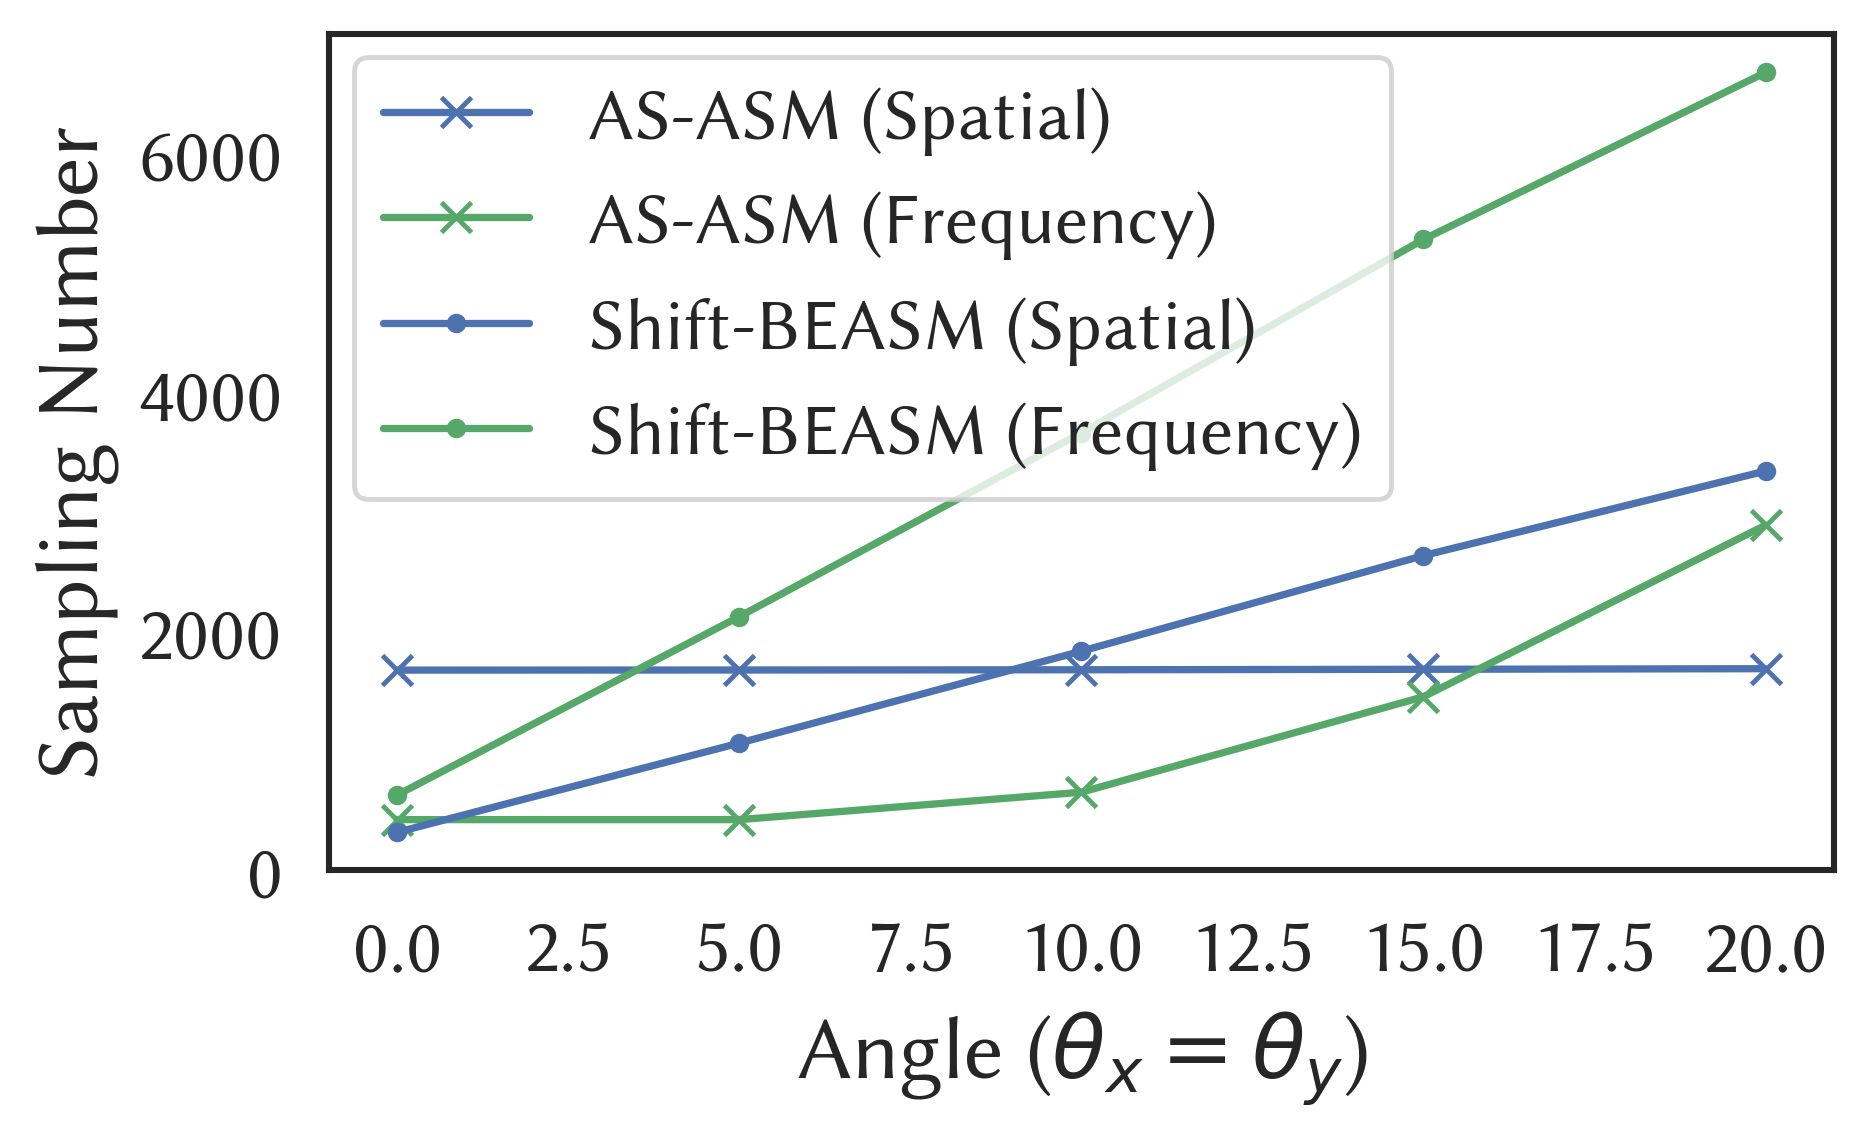

In [102]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5,3.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

color1 = 'b'
color2 = 'g'
ax1.plot(angles, Ns_ASASM, label='AS-ASM (Spatial)', marker='x', color=color1)
ax1.plot(angles, Nf_ASASM, label='AS-ASM (Frequency)', marker='x', color=color2)
ax1.plot(angles, Ns_BEASM1, label='Shift-BEASM (Spatial)', marker='.', color=color1)
ax1.plot(angles, Nf_BEASM1, label='Shift-BEASM (Frequency)', marker='.', color=color2)
plt.legend(prop=legend_font, loc='lower right', bbox_to_anchor=(0.73, 0.4))
plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font)
ax1.set_ylabel(fr'Sampling Number', fontproperties=font)
ax1.tick_params(axis='y') #, labelcolor=color1
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)

fig.tight_layout()

# Expansion $s$ v.s. Error

In [ ]:
elist1 = [1, 1.5, 2., 2.5, 3.5]
slist1 = [3.]
# slist2 = [1, 2, 4, 7, 10, 15, 20]

theta = 15

In [ ]:
im_GT = np.load(glob.glob(f'RS/RS*-{theta}-*.npy')[0])
# im_GT_plane = np.load(glob.glob(f'RS/RS*-{theta}-*.npy')[0])
err_ASASM = []
err_BEASM = []
# err_ASASM_plane = []
for e in elist1:
    for s in slist1:
        im_ASASM = np.load(glob.glob(f'results-s/ASASM*-{theta}-{e:.1f}-{s:.1f}.npy')[0])
        err_ASASM.append(snr(im_ASASM, im_GT))  
    # u_BEASM = np.load(glob.glob(f'results-s/BEASM*-{theta}-{s:.1f}.npy')[0])
    # err_BEASM.append(snr(u_BEASM, im_GT))  
# for s in slist2:
    # im_ASASM_plane = np.array(Image.open(f'results-s/ASASM-plane{Np,Np}-{theta,theta}-{s}.png'))
    # err_ASASM_plane.append(img_err(im_ASASM_plane, im_GT_plane))
err_ASASM = np.array(err_ASASM)
# err_ASASM_plane = np.array(err_ASASM_plane)

In [ ]:
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)
plt.xlabel(fr'Expansion factor ($s$)', fontproperties=font)
# plt.xlabel(fr'Frequency oversampling rate', fontproperties=font)
# plt.ylabel(fr'SNR ($dB$)', fontproperties=font)

color1 = 'b'
color2 = 'g'
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(elist1)
# ax1.set_xticklabels(slist1, fontdict=font)
l1 = ax1.plot(elist1, err_ASASM, marker='x', label='ASASM', color=color1)
# l2 = ax1.plot(slist1, err_BEASM, marker='.', label='BEASM', color=color1)
# ax1.set_xlim(0.8, 4.2)
ax1.set_ylabel(fr'SNR ($dB$)', fontproperties=font)

# ax2 = ax1.twinx()
# ax2.plot(slist1, t_ASASM, marker='x', label='ASASM', color=color2)
# ax2.plot(slist1, t_BEASM, marker='.', label='BEASM', color=color2)
# ax2.tick_params(axis='y', labelcolor=color2)
# ax2.set_ylabel(fr'Time (sec)', fontproperties=font)

# lns = l1 + l2 
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, prop=tick_font, loc='lower right')

fig.tight_layout()
plt.title(rf"$\theta={theta}^\circ, oversampling=3.0$")
# plt.savefig('results-s/figure.pdf')

# Results

In [ ]:
theta = 20
exps = 1.5
over = 1.5

from utils import remove_linear_phase
k = 2 * np.pi / 500e-9  # wavenumebr
z0 = 1.7  # source-aperture distance
z = 1/(1/35e-3 - 1/z0)  # image-side focal distance
R = z0 / np.sqrt(1 - np.sin(theta / 180 * np.pi)**2 - np.sin(theta / 180 * np.pi)**2)
x0, y0 = R * np.sin(theta / 180 * np.pi), R * np.sin(theta / 180 * np.pi)
s0, t0 = -x0 / z0 * z, -y0 / z0 * z
l = 35e-3 / 16 / 2 * 0.5  # radius of aperture
s = np.linspace(-l / 2 + s0, l / 2 + s0, 512, endpoint=False)
t = np.linspace(-l / 2 + t0, l / 2 + t0, 512, endpoint=False)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(np.array(Image.open(glob.glob(f'RS/RS*-{theta}-4.0-Phi.png')[0])), cmap='hsv')
plt.subplot(2,3,2)
u_ASASM = np.load(glob.glob(f'results-errplot1/ASASM*-{theta}-{exps}-{over}.npy')[0])
plt.imshow(remove_linear_phase(np.remainder(np.angle(u_ASASM), 2 * np.pi), theta, theta, s, t, k), cmap='hsv')
# plt.imshow(np.remainder(np.angle(u_ASASM), 2 * np.pi), cmap='hsv')
# plt.colorbar()
plt.subplot(2,3,3)
u_BEASM = np.load(glob.glob(f'results-errplot1/BEASM*-{theta}-{exps}.npy')[0])
plt.imshow(remove_linear_phase(np.remainder(np.angle(u_BEASM), 2 * np.pi), theta, theta, s, t, k), cmap='hsv')
# plt.imshow(np.remainder(np.angle(u_ASASM), 2 * np.pi), cmap='hsv')
# plt.colorbar()

plt.subplot(2,3,4)
plt.imshow(np.abs(u_ASASM), cmap='hsv')
plt.subplot(2,3,5)
plt.imshow(np.abs(u_BEASM), cmap='hsv')
plt.subplot(2,3,6)
plt.imshow(np.array(Image.open(glob.glob(f'RS/RS*-{theta}-4.0.png')[0])), cmap='hsv')